# 6. Shapley Values Exampels

For this set of examples we will use the hate_tweets dataset

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.pipeline import make_pipeline
import numpy as np
from myTextPreprocessing import MyTextPreproccesor

df = pd.read_csv("hateSpeechDataset.csv",delimiter = ';')
X = df['comment'].values
y = df['isHate'].values
class_names=['nonhate','hate']
X = [MyTextPreproccesor.my_clean(x,True,True,2) for x in X]
target_names = ['nonHateSpeech','HateSpeech']

(PS: This dataset is accessible here: https://intelligence.csd.auth.gr/research/hate-speech-detection)

In [2]:
X_train, X_test ,y_train ,y_test = train_test_split(X,y, random_state=826, stratify=y, test_size=0.2)

We have a text classification problem, thus we need to transform our sentences to vectors. We will tfidf vectorizing.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', max_features=300000, ngram_range=(1,5))
vectorizer.fit(X_train)
X_train2 = vectorizer.transform(X_train)
X_test_copy = X_test
X_test2 = vectorizer.transform(X_test)

## Classification with Logistic Regression

In [4]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

print("Logistic Regression Performance on HateSpeech:")
logReg = LogisticRegression(solver='newton-cg',max_iter=1000,C=10000,random_state=0)
logReg.fit(X_train2,y_train)
y_preds = logReg.predict(X_test2)
print(classification_report(y_test,y_preds,target_names=target_names))

Logistic Regression Performance on HateSpeech:
               precision    recall  f1-score   support

nonHateSpeech       0.77      0.82      0.80        85
   HateSpeech       0.75      0.69      0.72        67

    micro avg       0.76      0.76      0.76       152
    macro avg       0.76      0.76      0.76       152
 weighted avg       0.76      0.76      0.76       152



## Shap Explanations

In [5]:
import shap
shap.initjs()
explainer = shap.LinearExplainer(logReg, X_train2, feature_dependence="independent")
shap_values = explainer.shap_values(X_test2)
X_test_array = X_test2.toarray() # we need to pass a dense version for the plotting functions

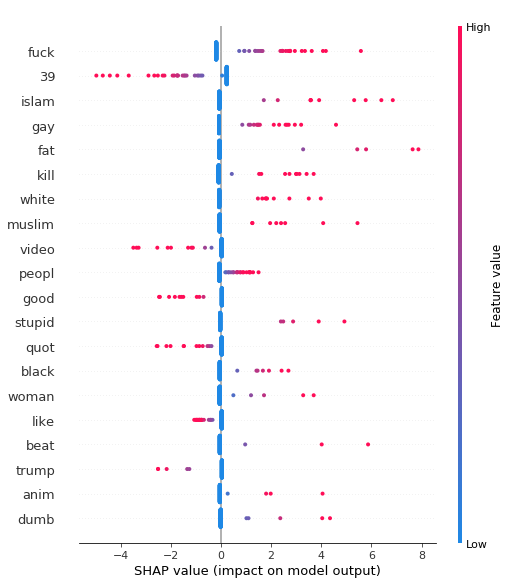

In [6]:
shap.summary_plot(shap_values, X_test_array, feature_names=vectorizer.get_feature_names())

In [7]:
print(X_test_copy[2])

good sweden fuck time


In [8]:
ind = 2
shap.force_plot(explainer.expected_value, shap_values[ind,:], X_test_array[ind,:],
    feature_names=vectorizer.get_feature_names())

In [9]:
print(X_test_copy[55])

ever wake one morn want smile happi


In [10]:
ind = 55
shap.force_plot(explainer.expected_value, shap_values[ind,:], X_test_array[ind,:],
    feature_names=vectorizer.get_feature_names())

In [11]:
print(X_test_copy[93])

die fuck arab dude sand nigga


In [12]:
ind = 93
shap.force_plot(explainer.expected_value, shap_values[ind,:], X_test_array[ind,:],
    feature_names=vectorizer.get_feature_names())